# Logistic Regression with ROC curve and ROC AUC score

# Logistic Regression
Logistic Regression is a statistical method for binary classification. It predicts the probability of a binary outcome based on one or more predictor variables. The output is a probability that can be converted into a class label (0 or 1) using a threshold.

# ROC Curve
The Receiver Operating Characteristic (ROC) curve is a graphical representation of a classifier's performance. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

True Positive Rate (TPR): Also known as Sensitivity or Recall, it is the ratio of correctly predicted positive observations to all actual positives.
TPR
=
True Positives
True Positives
+
False Negatives
TPR= 
True Positives+False Negatives
True Positives
​
 
False Positive Rate (FPR): It is the ratio of incorrectly predicted positive observations to all actual negatives.
FPR
=
False Positives
False Positives
+
True Negatives
FPR= 
False Positives+True Negatives
False Positives
# ROC AUC
Definition: ROC AUC (Area Under the Curve) is a metric that quantifies the overall performance of the classification model. It represents the area under the ROC curve.

Interpretation:

AUC = 0.5: The model performs no better than random guessing.
AUC > 0.5: The model has some level of discriminative power; the higher the AUC, the better the model is at distinguishing between positive and negative cases.
AUC = 1.0: The model perfectly distinguishes between all positive and negative cases.
Why It Matters
Comprehensive Performance Measure: Unlike accuracy, which can be misleading in imbalanced datasets, ROC AUC provides a more comprehensive measure of a model's ability to discriminate between classes.

Threshold Independence: ROC AUC evaluates model performance across all possible threshold settings, giving a more holistic view of the model's effectiveness.

In summary, the ROC AUC curve and its associated score provide a powerful way to evaluate and compare the performance of classification models, especially in scenarios where class imbalance is a concern.

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
x,y= make_classification(n_samples =1000 , n_classes = 2,random_state =1)

In [3]:
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size=0.25, random_state=42)

In [4]:
# created a dummy model with default 0 as ouput
dummy =[0 for _ in range(len(y_test))]
dummy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [6]:
# prediction based on probabilty
model_pro = logistic.predict_proba(x_test)

In [7]:
# lets focus on positive values
model_pro =model_pro[:,1]

In [8]:
# LET calcuate score
dummymodel = roc_auc_score(y_test,dummy)
modelauc =roc_auc_score(y_test,model_pro)
print(dummymodel)
print(modelauc)

0.5
0.9108885464817668


# CAUCLATE ROC CURVE

In [12]:
dummy_fpr, dummy_tpr ,_ =roc_curve(y_test,dummy)
model_fpr, model_tpr , thresholds=roc_curve(y_test,model_pro)

In [10]:
model_fpr, model_tpr

(array([0.        , 0.        , 0.        , 0.00757576, 0.00757576,
        0.01515152, 0.01515152, 0.02272727, 0.02272727, 0.03030303,
        0.03030303, 0.03787879, 0.03787879, 0.04545455, 0.04545455,
        0.0530303 , 0.0530303 , 0.06060606, 0.06060606, 0.06818182,
        0.06818182, 0.08333333, 0.08333333, 0.09090909, 0.09090909,
        0.09848485, 0.09848485, 0.11363636, 0.11363636, 0.12121212,
        0.12121212, 0.12878788, 0.12878788, 0.15909091, 0.15909091,
        0.18181818, 0.18181818, 0.18939394, 0.18939394, 0.20454545,
        0.20454545, 0.21969697, 0.21969697, 0.22727273, 0.22727273,
        0.24242424, 0.24242424, 0.31060606, 0.31060606, 0.32575758,
        0.32575758, 0.38636364, 0.38636364, 0.40909091, 0.40909091,
        0.41666667, 0.41666667, 0.53030303, 0.53030303, 0.53787879,
        0.53787879, 1.        ]),
 array([0.        , 0.00847458, 0.1440678 , 0.1440678 , 0.23728814,
        0.23728814, 0.28813559, 0.28813559, 0.36440678, 0.36440678,
        0.3728

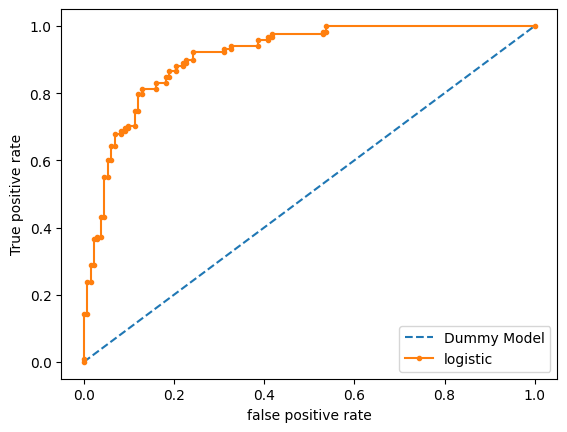

In [11]:
pyplot.plot(dummy_fpr ,dummy_tpr,linestyle ="--",label = "Dummy Model")
pyplot.plot(model_fpr ,model_tpr,marker = ".",label ="logistic")
pyplot.xlabel("false positive rate")
pyplot.ylabel("True positive rate")
pyplot.legend()
pyplot.show()

the below line of orange the entrire area is curve of logistic regresiin
logistic perform wells as compare to dummy model  area uc curve is greater then dummy model 
logistic threshold is bydefault 0.5 so how do we select threshold 

In [13]:
thresholds

array([           inf, 9.99738397e-01, 9.87033757e-01, 9.86362468e-01,
       9.57744551e-01, 9.57101721e-01, 9.45385188e-01, 9.40463485e-01,
       9.28300276e-01, 9.27356342e-01, 9.25607881e-01, 9.23728474e-01,
       8.94744248e-01, 8.94036983e-01, 8.43395917e-01, 8.38396411e-01,
       8.28791784e-01, 8.26684852e-01, 8.08489957e-01, 8.06352720e-01,
       7.80393330e-01, 7.63976766e-01, 7.63705186e-01, 7.63537905e-01,
       7.58496683e-01, 7.55347574e-01, 7.52623720e-01, 7.48020931e-01,
       7.23488083e-01, 7.23238629e-01, 6.74619385e-01, 6.56791269e-01,
       6.55162225e-01, 6.26882105e-01, 5.99962989e-01, 5.57931518e-01,
       5.39053079e-01, 5.14219160e-01, 5.05342549e-01, 4.96278090e-01,
       4.90154702e-01, 4.85201910e-01, 4.69275954e-01, 4.50983178e-01,
       4.46563018e-01, 4.39872005e-01, 4.24245353e-01, 3.24715881e-01,
       3.12906913e-01, 3.06694053e-01, 3.01325247e-01, 2.10358834e-01,
       2.06296724e-01, 1.91030219e-01, 1.69877066e-01, 1.42771985e-01,
      

based on threshild value we compute tp rate and fp rate  and we keep on plotting all this pointsand then whenver therr is hig tp rate and less fp rate we will capture that valueand that threshold will be slected

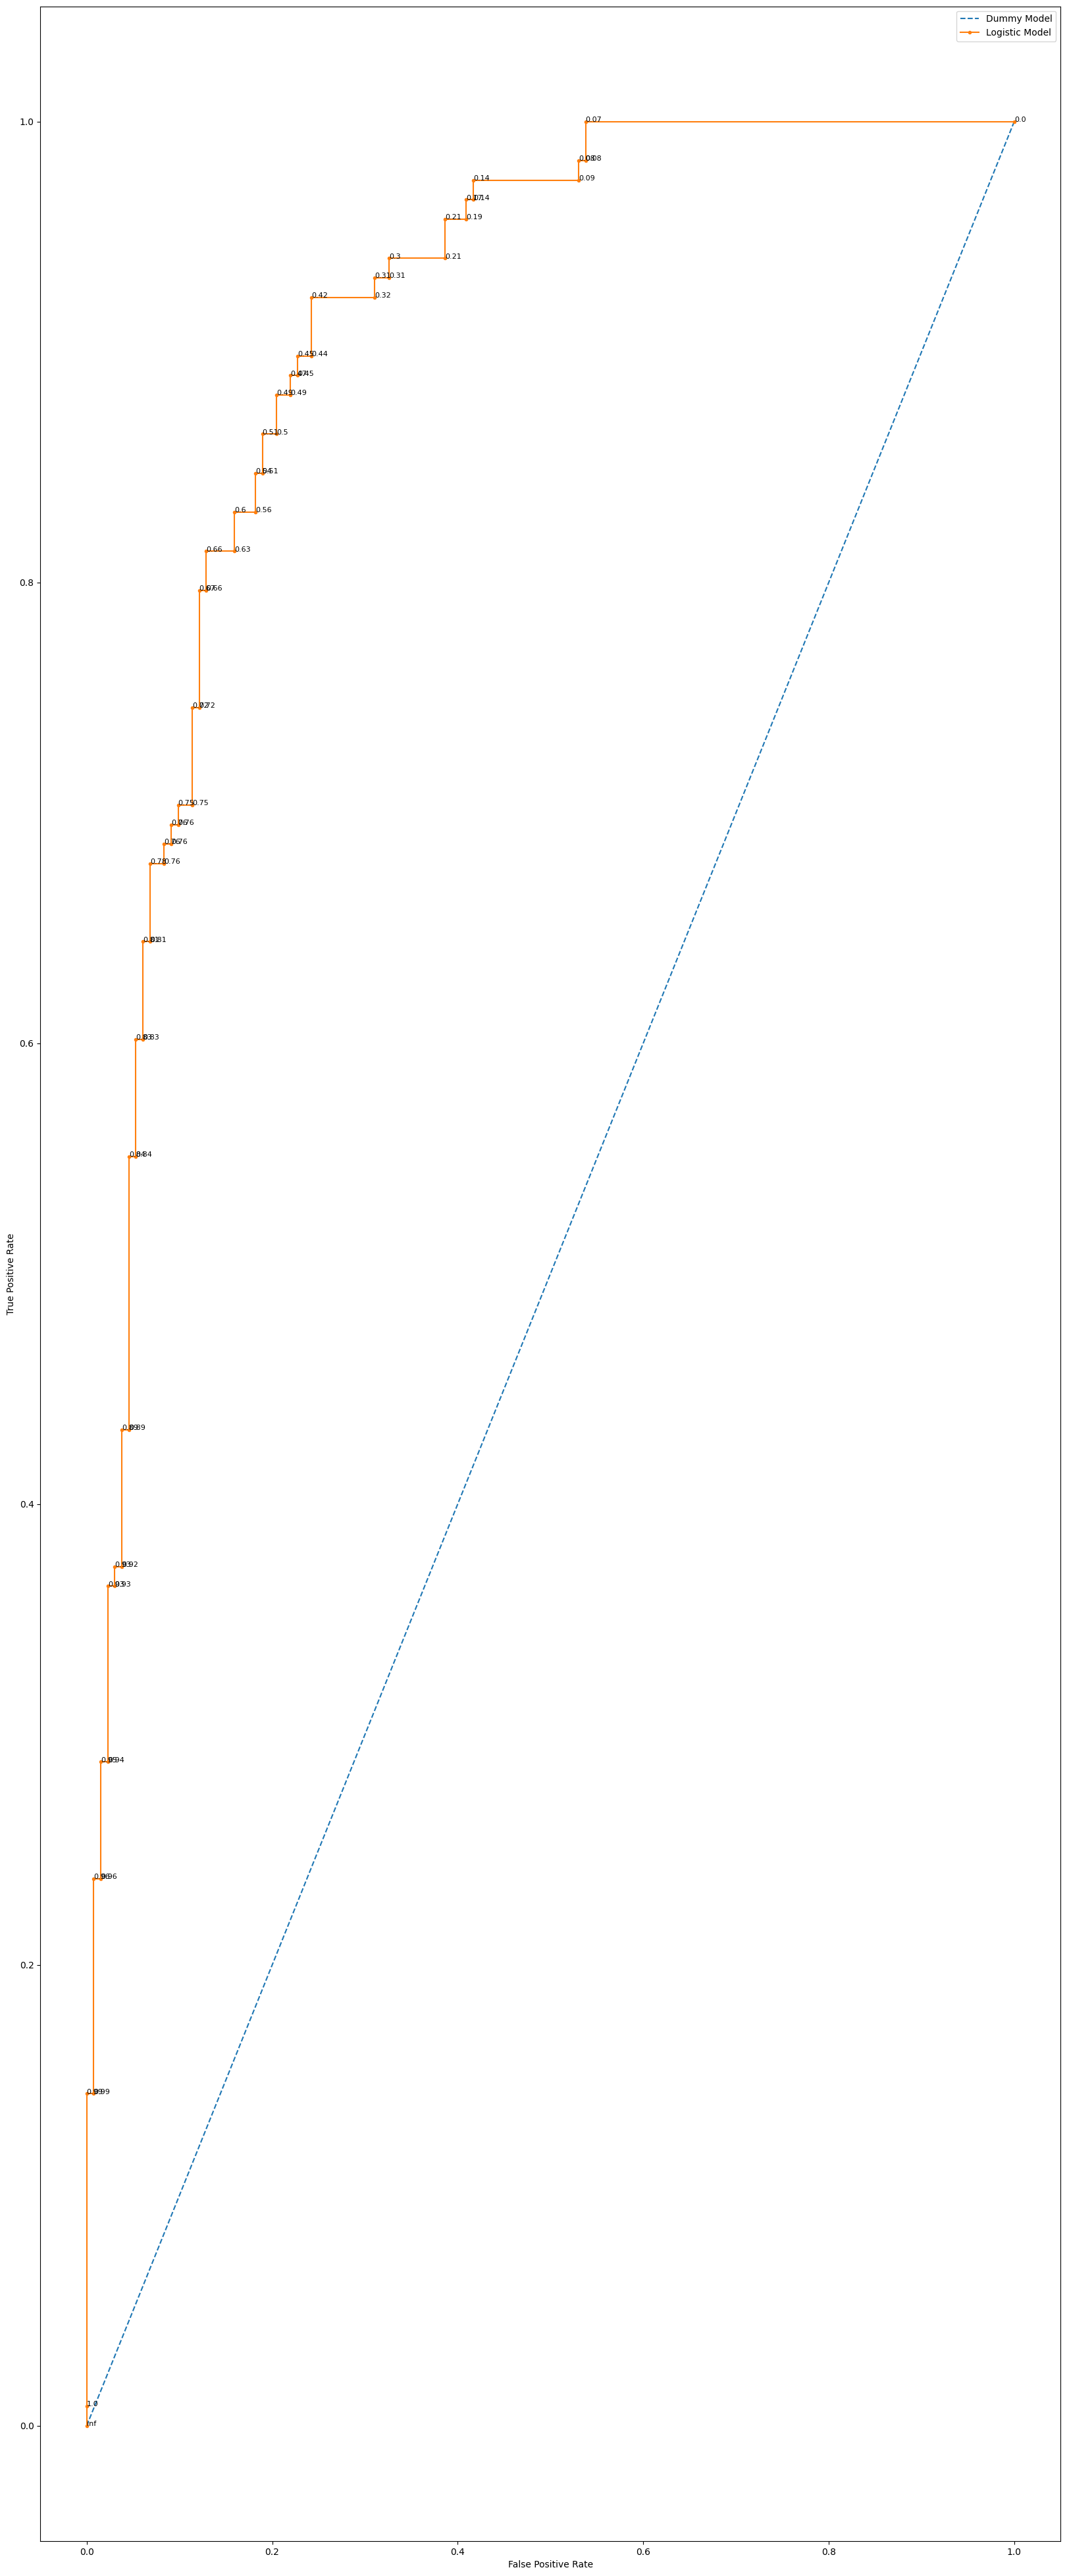

In [21]:
# Plot the ROC curves
fig, ax = pyplot.subplots(figsize=(20,50))  # Adjust figsize as needed
ax.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy Model")
ax.plot(model_fpr, model_tpr, marker=".", label="Logistic Model")

# Annotate the ROC curve
for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f"{np.round(xyz[2], 2)}", xy=(xyz[0], xyz[1]), fontsize=8)

# Axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

# Show the legend
ax.legend()

# Show the plot
pyplot.show()

if domain expertise say that your tp should be high and fp is less see the graph and find out